## Scope

This notebook is has useful boiler plate code for generating distributions and visualizing them. 

In [1]:
import numpy as np 
from scipy.stats import bernoulli, binom
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.special import comb
sns.set_theme(font_scale=1.0)
sns.set_style("white")
sns.set_style("ticks")
palette = sns.color_palette('deep')
#plt.style.use('dark_background') # cosmetic!

### Bernoulli

The probability mass function for a Bernoulli distribution is given by

$$
p \left( x \right) = \begin{cases}
\begin{array}{c}
1 - p  \; \; \; \textrm{if} \; x = 0 \\
p \; \; \; \textrm{if} \; x = 1
\end{array}\end{cases}
$$

for $x \in \left\{0, 1 \right\}$ and where $0 \leq p \leq 1$. 

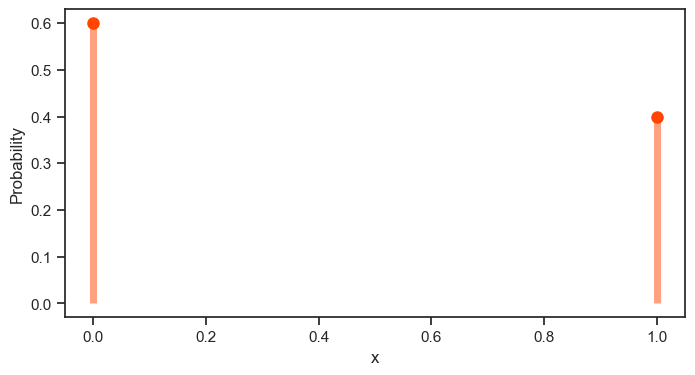

In [2]:
p = 0.4 # Bernoulli parameter
x = np.linspace(0, 1, 2)
probabilities = bernoulli.pmf(x, p)

fig = plt.figure(figsize=(8,4))

plt.plot(x, probabilities, 'o', ms=8, color='orangered')
plt.vlines(x, 0, probabilities, colors='orangered', lw=5, alpha=0.5)
plt.xlabel('x')
plt.ylabel('Probability')
plt.savefig('pdf.png', dpi=150, bbox_inches='tight', transparent=True)

plt.show()

One can generate random values from this distribution, i.e., 

In [3]:
X = bernoulli.rvs(p, size=500)
print(X)

[0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1
 0 1 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0
 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 1 0 0
 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0
 1 1 1 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 1 1
 1 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 1 1 0 0
 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0
 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1
 0 0 0 1 1 0 0 0 0 0 0 0 

Thus, random values from a Bernoulli distribution are inherently binary, and the number of 0s vs 1s will vary depending on the choice of the parameter, $p$. We will see later on (in another notebook) how this relatively simple idea can be used to train a *Naive Bayes Classifier*. For now, we will plot the expected value of the Bernoulli random variable with increasing number of samples. 

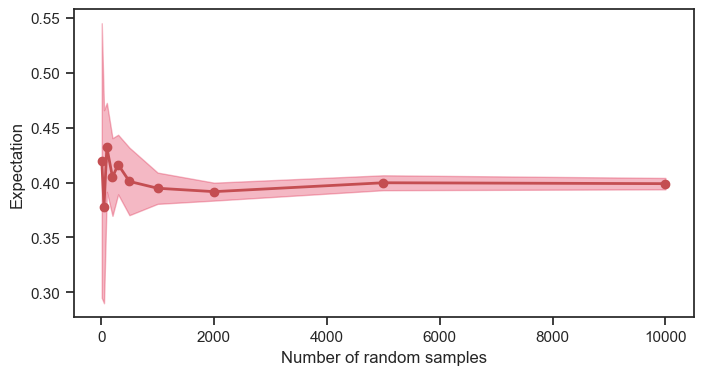

In [10]:
numbers = [10, 50, 100, 200, 300, 500, 1000, 2000, 5000, 10000]
means = []
stds = []
for j in numbers:
    X_val = []
    for q in range(0, 10):
        X = bernoulli.rvs(p, size=j)
        X_val.append(np.mean(X))
    means.append(np.mean(X_val))
    stds.append(np.std(X_val))

means = np.array(means)
stds = np.array(stds)
numbers = np.array(numbers)

fig = plt.figure(figsize=(8,4))
plt.plot(numbers, means, 'ro-', lw=2)
plt.fill_between(numbers, means + stds, means - stds, color='crimson', alpha=0.3)
plt.xlabel('Number of random samples')
plt.ylabel('Expectation')
plt.savefig('convergence.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

### Binomial 

Next, we consider the Binomial distribution. It has a probability mass function 

$$
p \left( x \right) = \left(\begin{array}{c}
n\\
x
\end{array}\right)p^{x}\left(1-p\right)^{n-x}
$$

for $x \in \left\{0, 1, \ldots, n \right\}$ and where $0 \leq p \leq 1$. 

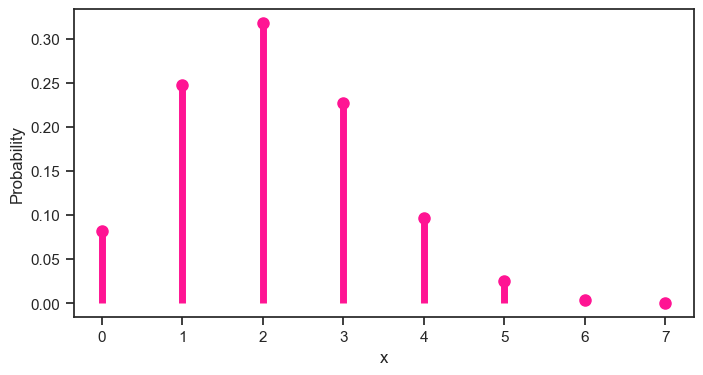

In [11]:
p = 0.3 # Bernoulli parameter
n = 7
x = np.arange(0, n+1)
probabilities = binom(n, p)

fig = plt.figure(figsize=(8,4))
plt.plot(x, probabilities.pmf(x), 'o', ms=8, color='deeppink')
plt.vlines(x, 0, probabilities.pmf(x), colors='deeppink', lw=5 )
plt.xlabel('x')
plt.ylabel('Probability')
plt.savefig('pdf_2.png', dpi=150, bbox_inches='tight', transparent=True)
plt.show()

To work out the probability at $x=3$, we can compute:

In [12]:
prob = comb(N=n, k=3) * p**3 * (1 - p)**(n - 3)
print(prob)

0.22689449999999992
